#Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Packages

In [2]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 
from keras.utils.np_utils import to_categorical
 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
 
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
 
from keras.callbacks import EarlyStopping,ModelCheckpoint
 
from keras import regularizers
 
from sklearn.preprocessing import LabelEncoder
 
import os

#Load np array X and y

In [3]:
# Dataset for lab examination

#X=np.load('Give data location')
#y=np.load('Give data location')

# Data Set 1
 
X=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_Cambridge/cough_X_features_np.npy')
y=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_Cambridge/cough_y_features_np.npy')
 
# Data Set 2

#X=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_cough_Coswara_Cambridge/cough_X_features_np.npy')
#y=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_cough_Coswara_Cambridge/cough_y_features_np.npy')

# Data Set 3
 
#X=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_cough_Coswara/cough_X_features_np.npy')
#y=np.load('/content/drive/My Drive/Colab Notebooks/Data Sets/COVID-19_cough_Coswara/cough_y_features_np.npy')

label_to_id = {v:i for i,v in enumerate(np.unique(y))}
id_to_label = {v: k for k, v in label_to_id.items()}
y = np.array([label_to_id[x] for x in y])

In [4]:
# Checking our shapes
X.shape
print(X.shape)
print(X[0])

(491, 193)
[ 7.77401599e-01 -5.42586290e-02 -3.51442690e-01  1.16804023e+00
 -6.74119788e-01  8.87315877e-02 -2.88286225e-01 -5.53203080e-01
  9.72997221e-01 -5.57250547e-01  6.52287394e-01 -8.50451541e-01
 -5.65986331e-01  4.31844030e-02 -5.14129264e-01 -5.96682829e-01
 -1.11943737e+00  6.03958520e-01 -6.39882481e-01 -2.47991108e-01
  9.59666732e-01 -6.87096134e-01 -6.88488369e-02 -5.67411256e-01
 -7.55714631e-01 -6.21515650e-01 -1.50639232e+00 -1.45388970e+00
 -1.04613563e+00 -7.07596247e-01 -1.86978797e+00 -1.30437762e+00
 -4.33160758e-01 -1.25598019e+00 -3.07713591e-01 -1.23443499e+00
 -4.19461941e-01  2.27284287e-01 -2.87355171e-01 -3.31512615e-01
  3.65332342e-01  5.22520771e-01  6.90722428e-01  9.55322684e-01
  1.00734130e+00  1.03694038e+00  1.28135442e+00  8.86940686e-01
  3.75853024e-01  1.66873597e-01  6.11422730e-01  5.54346136e-01
 -1.15835265e-01 -2.23177680e-01 -1.01676148e-01  5.19846770e-01
  5.62779619e-01  6.95082637e-01  1.09428963e+00  1.68783566e+00
  6.19605871e-

In [5]:
# Checking our shapes
y.shape
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


# Cross Validation Packages

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import StratifiedKFold, KFold,StratifiedShuffleSplit
from sklearn.model_selection import cross_validate

from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC

from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.kernel_approximation import RBFSampler

from sklearn.pipeline import Pipeline

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import ComplementNB,BernoulliNB
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Grid Search for Hyper-Parameters Estimation

In [10]:
# grid search class weights with svm for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
# generate dataset
 
# define model
 
model = MLPClassifier(max_iter=10)
 
#define grid
 
param_grid = {   
    'hidden_layer_sizes': [(64,64),(128,64),(512,)],
    'activation': ['tanh', 'logistic'],
    'learning_rate': ['constant','adaptive'],  
}
 
# define evaluation procedure
 
cv = StratifiedKFold(n_splits=10)
 
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.773238 using {'activation': 'tanh', 'hidden_layer_sizes': (512,), 'learning_rate': 'adaptive'}
0.758830 (0.108262) with: {'activation': 'tanh', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant'}
0.772816 (0.110695) with: {'activation': 'tanh', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'adaptive'}
0.745973 (0.127206) with: {'activation': 'tanh', 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant'}
0.763605 (0.111787) with: {'activation': 'tanh', 'hidden_layer_sizes': (128, 64), 'learning_rate': 'adaptive'}
0.769660 (0.090301) with: {'activation': 'tanh', 'hidden_layer_sizes': (512,), 'learning_rate': 'constant'}
0.773238 (0.077160) with: {'activation': 'tanh', 'hidden_layer_sizes': (512,), 'learning_rate': 'adaptive'}
0.704095 (0.122198) with: {'activation': 'logistic', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'constant'}
0.713102 (0.111274) with: {'activation': 'logistic', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'adaptive'}
0.712789 (0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Cross Validation(Train+Test) 

In [11]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

model = MLPClassifier(hidden_layer_sizes=(512,),activation= 'tanh',learning_rate='constant',max_iter=10) # Include parameter based on grid search output

#cv = LeaveOneOut()
#cv = KFold(n_splits=10)
cv = StratifiedKFold(n_splits=10)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

#print(scores.mean())

y_pred = cross_val_predict(model, X, y, cv=cv)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[0.76       0.85714286 0.7755102  0.75510204 0.75510204 0.65306122
 0.71428571 0.67346939 0.69387755 0.81632653]
Accuracy: 0.745 (0.060)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilaye

[[ 86  55]
 [ 71 279]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Cross Validation(Train+Test) (Seperate Confusion Matrix)

Total Data
(491, 193)
Cross Validation split
(441, 193)
(50, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[11  4]
 [11 24]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[13  1]
 [ 7 28]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[12  2]
 [ 9 26]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 7  7]
 [ 8 27]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[10  4]
 [ 9 26]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 7  7]
 [ 8 27]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 6  8]
 [ 8 27]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 6  8]
 [ 6 29]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 5  9]
 [ 5 30]]
Total Data
(491, 193)
Cross Validation split
(442, 193)
(49, 193)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 8  6]
 [ 4 31]]
Mean Confusion Matrix
[[ 8.5  5.6]
 [ 7.5 27.5]]


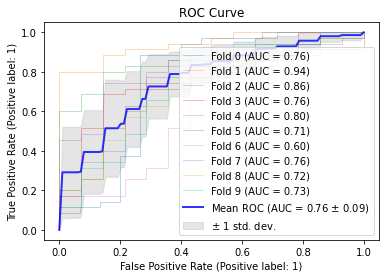

In [12]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

model = MLPClassifier(hidden_layer_sizes=(512,),activation= 'tanh',learning_rate='adaptive',max_iter=10) # Include parameter based on grid search output

#cv = LeaveOneOut()
#cv = KFold(n_splits=10)
cv = StratifiedKFold(n_splits=10)

conf_matrix_list_of_arrays = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   print('Total Data')
   print(X.shape)
   print('Cross Validation split')
   print(X_train.shape)
   print(X_test.shape)

   model.fit(X_train, y_train)
   conf_matrix = confusion_matrix(y_test, model.predict(X_test))
   print(conf_matrix)
   conf_matrix_list_of_arrays.append(conf_matrix)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print('Mean Confusion Matrix')
print(mean_of_conf_matrix_arrays)

#print(conf_mat)

# Training and Testing Divide and model build

In [ ]:
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None, stratify=y)

# Checking  shapes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))

model = MLPClassifier(hidden_layer_sizes=(128,64,),activation= 'tanh',learning_rate='constant',max_iter=10) # Include parameter based on grid search output
model.fit(X_train, y_train)
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print(conf_matrix)

(392, 193)
(99, 193)
(392,)
(99,)
Counter({1: 350, 0: 141})
Counter({1: 279, 0: 113})
Counter({1: 71, 0: 28})
[[19  9]
 [16 55]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Training and Testing Divide and Train SMOTE and model build

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None, stratify=y)

# Checking  shapes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(Counter(y))
print(Counter(y_train))
print(Counter(y_test))

counter=Counter(y_train)
print(counter)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

model = MLPClassifier(hidden_layer_sizes=(128,64),activation= 'tanh',learning_rate='constant',max_iter=10) # Include parameter based on grid search output
model.fit(X_train, y_train)
conf_matrix = confusion_matrix(y_test, model.predict(X_test))
print(conf_matrix)

(392, 193)
(99, 193)
(392,)
(99,)
Counter({1: 350, 0: 141})
Counter({1: 279, 0: 113})
Counter({1: 71, 0: 28})
Counter({1: 279, 0: 113})
Counter({1: 279, 0: 279})
[[23  5]
 [18 53]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Cross Validation (Train(SMOTE)+Test)

Counter({1: 315, 0: 126})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[12  3]
 [12 23]]
Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[14  0]
 [ 6 29]]
Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[12  2]
 [10 25]]
Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 9  5]
 [10 25]]
Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[10  4]
 [12 23]]
Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 6  8]
 [ 8 27]]
Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 7  7]
 [ 9 26]]
Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 8  6]
 [ 6 29]]
Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 9  5]
 [10 25]]
Counter({1: 315, 0: 127})
Counter({0: 315, 1: 315})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


[[ 9  5]
 [ 7 28]]
[[ 9  5]
 [ 7 28]]
[[ 9.6  4.5]
 [ 9.  26. ]]
Accuracy: 0.725 (0.060)


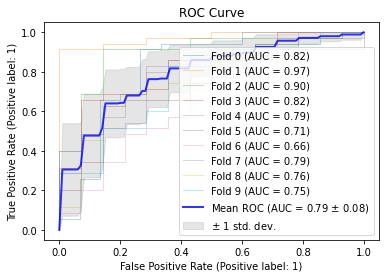

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold
 
model = MLPClassifier(hidden_layer_sizes=(512,),activation= 'tanh',learning_rate='adaptive',max_iter=10) # Include parameter based on grid search output
 
#cv = LeaveOneOut()
#cv = StratifiedKFold(n_splits=5,shuffle=False)
cv = StratifiedKFold(n_splits=10)
  
conf_matrix_list_of_arrays = []
accuracy_scores=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):
 
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
 
   counter=Counter(y_train)
   print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   print(counter)
 
   model.fit(X_train, y_train)
   conf_matrix = confusion_matrix(y_test, model.predict(X_test))
   print(conf_matrix)
   conf_matrix_list_of_arrays .append(conf_matrix)
   acc_score=accuracy_score(y_test, model.predict(X_test))
   accuracy_scores.append(acc_score)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)
 
#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)
 
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
 
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')
 
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')
 
#conf_matrix=np.add(conf_matrix_list_of_arrays,axis=0)
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(conf_matrix)
print(mean_of_conf_matrix_arrays)
mean_accuracy_scores=np.mean(accuracy_scores, axis=0)
#print(mean_accuracy_scores)
print('Accuracy: %.3f (%.3f)' % (mean(accuracy_scores), std(accuracy_scores)))
 
#print(conf_mat)

# Threshold-Moving for Imbalanced Classification

In [ ]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=None, stratify=y)

# Checking  shapes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

# fit a model

model = MLPClassifier(hidden_layer_sizes=(512,),activation= 'tanh',learning_rate='adaptive',max_iter=10) # Include parameter based on grid search output

model.fit(X_train, y_train)
# predict probabilities
y_pred = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = y_pred[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
#thresholds = arange(0, 1, 0.1)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
#scores = [metrics.roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.4f, AUC-Score=%.4f' % (thresholds[ix], scores[ix]))
conf_mat = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
print(conf_mat)
acc_score=accuracy_score(y_test, to_labels(probs, thresholds[ix]))
print('Accuracy=%.4f' %acc_score)
auc_score = roc_auc_score(y_test, to_labels(probs, thresholds[ix]))
print('AUC Score=%.4f' %auc_score)
print(classification_report(y_test, to_labels(probs, thresholds[ix]),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))

(392, 193)
(99, 193)
(392,)
(99,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Threshold=0.3460, AUC-Score=0.8552
[[16 12]
 [ 9 62]]
Accuracy=0.7879
AUC Score=0.7223
              precision    recall  f1-score   support

           0       0.64      0.57      0.60        28
           1       0.84      0.87      0.86        71

    accuracy                           0.79        99
   macro avg       0.74      0.72      0.73        99
weighted avg       0.78      0.79      0.78        99



# Cross Validation(Train(SMOTE)+Test) and Threshold Moving

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Threshold=0.335, AUC-Score=0.84286
[[12  3]
 [ 4 31]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Threshold=0.225, AUC-Score=0.95000
[[13  1]
 [ 1 34]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Threshold=0.088, AUC-Score=0.84286
[[10  4]
 [ 1 34]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


KeyboardInterrupt: ignored

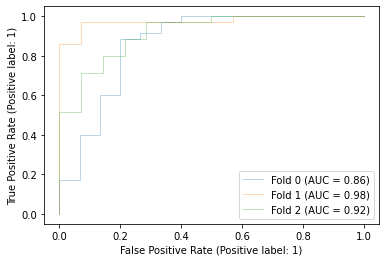

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

model = MLPClassifier(hidden_layer_sizes=(512,),activation= 'tanh',learning_rate='adaptive',max_iter=10) # Include parameter based on grid search output


#cv = LeaveOneOut()
#cv = StratifiedKFold(n_splits=5,shuffle=False)
cv = StratifiedKFold(n_splits=10)


conf_matrix_list_of_arrays = []
accuracy_scores=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   #counter=Counter(y_train)
   #print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   #print(counter)

   model.fit(X_train, y_train)
  
   y_pred = model.predict_proba(X_test)
   # keep probabilities for the positive outcome only
   probs = y_pred[:, 1]
   # define thresholds
   thresholds = arange(0, 1, 0.001)
   #thresholds = arange(0, 1, 0.1)
   # evaluate each threshold
   #scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
   scores = [metrics.roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]
   # get best threshold
   ix = argmax(scores)
   print('Threshold=%.3f, AUC-Score=%.5f' % (thresholds[ix], scores[ix]))
   conf_matrix = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
   print(conf_matrix)
   conf_matrix_list_of_arrays .append(conf_matrix)
   acc_score=accuracy_score(y_test, to_labels(probs, thresholds[ix]))
   #print('Accuracy=%.4f' %acc_score)
   accuracy_scores.append(acc_score)

   #print(classification_report(y_test, to_labels(probs, thresholds[ix],labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(model, X_test, y_test,name='Fold {}'.format(i),alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

#conf_matrix=np.add(conf_matrix_list_of_arrays,axis=0)
mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(conf_matrix)
print(mean_of_conf_matrix_arrays)
mean_accuracy_scores=np.mean(accuracy_scores, axis=0)
#print(mean_accuracy_scores)
print('Accuracy: %.3f (%.3f)' % (mean(accuracy_scores), std(accuracy_scores)))

#print(conf_mat)

# Nested Cross Validation with Hyperparameter Estimation and Threshold Moving

Counter({1: 280, 0: 112})
Counter({0: 280, 1: 280})


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Threshold=0.028, AUC-Score=0.71995
[[14 15]
 [ 3 67]]
>acc=0.818, est=0.898, cfg={'activation': 'relu', 'hidden_layer_sizes': (128, 128), 'learning_rate': 'adaptive', 'solver': 'adam'}
Counter({1: 280, 0: 113})
Counter({0: 280, 1: 280})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Max

Threshold=0.841, AUC-Score=0.76071
[[19  9]
 [11 59]]
>acc=0.796, est=0.895, cfg={'activation': 'relu', 'hidden_layer_sizes': (128, 128), 'learning_rate': 'constant', 'solver': 'adam'}
Counter({1: 280, 0: 113})
Counter({0: 280, 1: 280})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Max

Threshold=0.027, AUC-Score=0.71786
[[13 15]
 [ 2 68]]
>acc=0.827, est=0.886, cfg={'activation': 'relu', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'invscaling', 'solver': 'adam'}
Counter({1: 280, 0: 113})
Counter({0: 280, 1: 280})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Max

Threshold=0.997, AUC-Score=0.77500
[[25  3]
 [24 46]]
>acc=0.724, est=0.884, cfg={'activation': 'relu', 'hidden_layer_sizes': (64, 64), 'learning_rate': 'invscaling', 'solver': 'adam'}
Counter({1: 280, 0: 113})
Counter({0: 280, 1: 280})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Max

Threshold=0.783, AUC-Score=0.73929
[[19  9]
 [14 56]]
>acc=0.765, est=0.909, cfg={'activation': 'relu', 'hidden_layer_sizes': (128, 128), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Accuracy: 0.786 (0.037)
[[18.  10.2]
 [10.8 59.2]]
[array([[14, 15],
       [ 3, 67]]), array([[19,  9],
       [11, 59]]), array([[13, 15],
       [ 2, 68]]), array([[25,  3],
       [24, 46]]), array([[19,  9],
       [14, 56]])]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


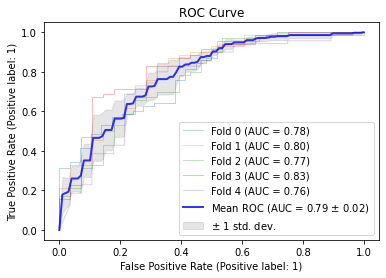

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from numpy import argmax

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

cv_outer = StratifiedKFold(n_splits=5,shuffle=True)

# enumerate splits
outer_results = list()
conf_matrix_list_of_arrays = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv_outer.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   counter=Counter(y_train)
   print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   print(counter)

   cv_inner = StratifiedKFold(n_splits=5,shuffle=True)

   model = MLPClassifier()
   # define search space
   space = dict()
   space['hidden_layer_sizes'] = [(64,),(64,64,),(128,),(128,128,)]
   space['activation'] = ["identity", "logistic","tanh","relu"]
   space['solver'] = ["lbfgs", "sgd", "adam"]
   space['learning_rate'] = ["constant", "invscaling","adaptive"]


   # define search
   search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
   # execute search
   result = search.fit(X_train, y_train)
   # get the best performing model fit on the whole training set
   best_model = result.best_estimator_
   # evaluate model on the hold out dataset
   #y_pred = best_model.predict(X_test)
   y_pred = best_model.predict_proba(X_test)
   # keep probabilities for the positive outcome only
   probs = y_pred[:, 1]
   # define thresholds
   thresholds = arange(0, 1, 0.001)
   # evaluate each threshold
   #scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
   scores = [metrics.roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]
   # get best threshold
   ix = argmax(scores)
   print('Threshold=%.3f, AUC-Score=%.5f' % (thresholds[ix], scores[ix]))
   conf_matrix = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
   print(conf_matrix)
   acc=accuracy_score(y_test, to_labels(probs, thresholds[ix]))
   #print('Accuracy=%.4f' %acc)

   # store the result
   outer_results.append(acc)
   # report progress
   print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
   conf_matrix_list_of_arrays.append(conf_matrix)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(best_model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(mean_of_conf_matrix_arrays)

print(conf_matrix_list_of_arrays)

Counter({1: 280, 0: 112})
Counter({0: 280, 1: 280})


TypeError: ignored

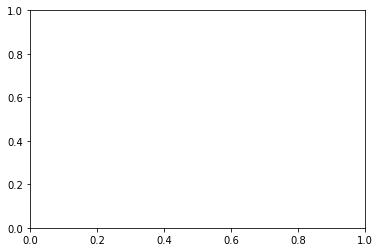

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from numpy import argmax

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

cv_outer = StratifiedKFold(n_splits=5,shuffle=True)

# enumerate splits
outer_results = list()
conf_matrix_list_of_arrays = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i,(train_index, test_index) in enumerate(cv_outer.split(X, y)):

   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

   counter=Counter(y_train)
   print(counter)
   oversample = SMOTE()
   X_train, y_train = oversample.fit_resample(X_train, y_train)
   counter = Counter(y_train)
   print(counter)

   cv_inner = StratifiedKFold(n_splits=5,shuffle=True)
   model_1 = MLPClassifier(hidden_layer_sizes=(512,),activation= 'tanh',learning_rate='adaptive',max_iter=10) 

   model = MLPClassifier()
   # define search space
   space = dict()
   space['hidden_layer_sizes'] = [(64,),(64,64,),(128,),(128,128,)]
   space['activation'] = ["identity", "logistic","tanh","relu"]
   space['solver'] = ["lbfgs", "sgd", "adam"]
   space['learning_rate'] = ["constant", "invscaling","adaptive"]


   # define search
   search = GridSearchCV(model, model_1, space, scoring='accuracy', cv=cv_inner, refit=True)
   # execute search
   result = search.fit(X_train, y_train)
   # get the best performing model fit on the whole training set
   best_model = result.best_estimator_
   # evaluate model on the hold out dataset
   #y_pred = best_model.predict(X_test)
   y_pred = best_model.predict_proba(X_test)
   # keep probabilities for the positive outcome only
   probs = y_pred[:, 1]
   # define thresholds
   thresholds = arange(0, 1, 0.001)
   # evaluate each threshold
   #scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
   scores = [metrics.roc_auc_score(y_test, to_labels(probs, t)) for t in thresholds]
   # get best threshold
   ix = argmax(scores)
   print('Threshold=%.3f, AUC-Score=%.5f' % (thresholds[ix], scores[ix]))
   conf_matrix = confusion_matrix(y_test, to_labels(probs, thresholds[ix]))
   print(conf_matrix)
   acc=accuracy_score(y_test, to_labels(probs, thresholds[ix]))
   #print('Accuracy=%.4f' %acc)

   # store the result
   outer_results.append(acc)
   # report progress
   print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
   conf_matrix_list_of_arrays.append(conf_matrix)
   #print(classification_report(y_test, model.predict(X_test),labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'))
   viz = plot_roc_curve(best_model, X_test, y_test,
                         name='Fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
   interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
   interp_tpr[0] = 0.0
   tprs.append(interp_tpr)
   aucs.append(viz.roc_auc)

print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        #label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve")
ax.legend(loc="lower right")
#plt.show()
fig.savefig('/content/drive/My Drive/Colab Notebooks/ROC_Curve.jpg')

mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
print(mean_of_conf_matrix_arrays)

print(conf_matrix_list_of_arrays)

# Ensemble Bagging

In [ ]:
from numpy import mean
from numpy import std
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedKFold

model = MLPClassifier(max_iter=100, hidden_layer_sizes=(64,64),activation= 'relu',learning_rate='adaptive') # Include parameter based on grid search output

bagging_models = BaggingClassifier(base_estimator=model,n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred = bagging_models.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(y_test)
print(y_pred)
acc_score=accuracy_score(y_test, y_pred)
print(acc_score)
auc_score = metrics.roc_auc_score(y_test, y_pred)
print(auc_score)

# p-value Test

In [ ]:
from sklearn.model_selection import permutation_test_score
clf = MLPClassifier(max_iter=100, hidden_layer_sizes=(64,64),activation= 'relu',learning_rate='adaptive') # Include parameter based on grid search output
cv = StratifiedKFold(2, shuffle=True, random_state=0)
#cv = StratifiedKFold(n_splits=10)

score_cough, perm_scores_cough, pvalue_cough = permutation_test_score(
    clf, X, y, scoring="accuracy", cv=cv, n_permutations=100)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


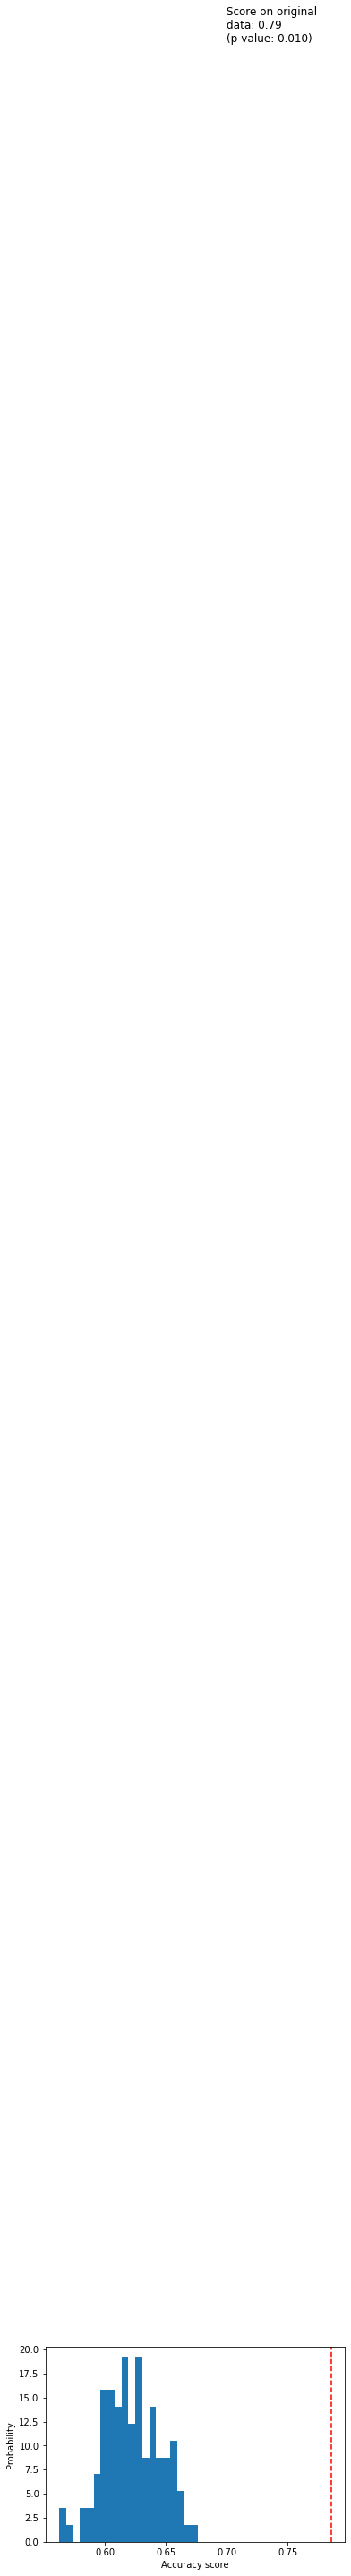

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_cough, bins=20, density=True)
ax.axvline(score_cough, ls='--', color='r')
score_label = (f"Score on original\ndata: {score_cough:.2f}\n"
               f"(p-value: {pvalue_cough:.3f})")
ax.text(0.7, 260, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")